### 내 풀이

In [17]:
def solution(priorities, location):
    """
    아예 풀이 방법을 문제에다가 적어놔부렀네
    인쇄 대기 목록의 가장 앞에 있는 문서를 꺼냄
    나머지 목록들중에서 해당 문서보다 중요도가 높은 문서가 1개라도 존재하면 대기목록의 최하위로 다시 넣음
    꺼낸 문서가 제일 중요도가 높다면 이를 인쇄함
    
    priorities = [2,1,3,2]
    location = 2 # 내가 원하는 인쇄 문서가 현재 어느 위치에 있는지. 제일 앞이 0임.
    return = 1 # 몇번째로 인쇄되는지 출력
    
    대기목록 리스트는 크기가 100 이하이므로 효율성 문제가 아님.
    중요도는 숫자가 클수록 중요한거임.
    중요도가 둘이 겹칠수도 있음.
    
    """
    #1. Target을 표시하기 위해 list를 변형시켜서 튜플의 리스트로 만듬. 
    target_list = []
    for idx, p in enumerate(priorities):
        if idx == location: # target
            target_list.append(("T", p))
        else:
            target_list.append(("N", p))
    #print(target_list)
    
    #2. list를 queue에 박음
    from collections import deque
    queue = deque(tup for tup in target_list) 
    print(queue)
    
    #3. loop 돌려서 제일 앞에 들어간넘 pop해서 뒤에 남은 애들과 비교하기
    print_list = []
    while queue:
        
        poped = queue.popleft()
        max_val = max(i[1] for i in queue)
        
        #4. 젤 앞에 있는넘이 max값보다 크거나 같으면 프린트 리스트에 넣고, 아니면 enqueue하자.
        if poped[1] >= max_val: # 프린트하자.
            print_list.append(poped[0])
            
            #5. 종료조건 : 만약 print_list에 가장 최근에 들어간 값이 T인 경우, 종료
            if poped[0] == 'T':
                break
                
        else:
            queue.append(poped) # 다시 큐에 넣기
        
    print(print_list)
    
    #6. 제대로 돌아갔으면 print_list의 제일 마지막 값은 T일 것이다. len을 결과값으로 출력한다.
    return len(print_list)

In [18]:
priorities = [2, 1, 3, 2]
location = 2
solution(priorities, location)

deque([('N', 2), ('N', 1), ('T', 3), ('N', 2)])
['T']


1

In [19]:
p = [1, 1, 9, 1, 1, 1]
l = 0
solution(p,l)

deque([('T', 1), ('N', 1), ('N', 9), ('N', 1), ('N', 1), ('N', 1)])
['N', 'N', 'N', 'N', 'T']


5

### 제출 첫번째

In [ ]:
def solution(priorities, location):

    #1. Target을 표시하기 위해 list를 변형시켜서 튜플의 리스트로 만듬. 
    target_list = []
    for idx, p in enumerate(priorities):
        if idx == location: # target
            target_list.append(("T", p))
        else:
            target_list.append(("N", p))
    
    #2. list를 queue에 박음
    from collections import deque
    queue = deque(tup for tup in target_list) 
    
    #3. loop 돌려서 제일 앞에 들어간넘 pop해서 뒤에 남은 애들과 비교하기
    print_list = []
    while queue:
        
        poped = queue.popleft()
        max_val = max(i[1] for i in queue)
        
        #4. 젤 앞에 있는넘이 max값보다 크거나 같으면 프린트 리스트에 넣고, 아니면 enqueue하자.
        if poped[1] >= max_val: # 프린트하자.
            print_list.append(poped[0])
            
            #5. 종료조건 : 만약 print_list에 가장 최근에 들어간 값이 T인 경우, 종료
            if poped[0] == 'T':
                break
                
        else:
            queue.append(poped) # 다시 큐에 넣기
    
    #6. 제대로 돌아갔으면 print_list의 제일 마지막 값은 T일 것이다. len을 결과값으로 출력한다.
    return len(print_list)

### 런타임 에러가 뜸 ㅠ
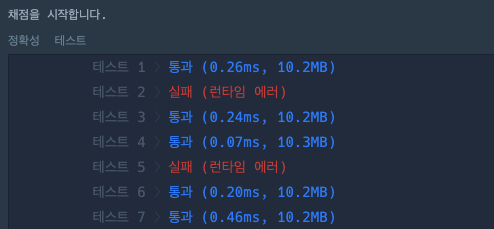

### 디버깅

In [27]:
def solution(priorities, location):

    #1. Target을 표시하기 위해 list를 변형시켜서 튜플의 리스트로 만듬. 
    target_list = []
    for idx, p in enumerate(priorities):
        if idx == location: # target
            target_list.append(("T", p))
        else:
            target_list.append(("N", p))
    
    #2. list를 queue에 박음
    from collections import deque
    queue = deque(tup for tup in target_list) 
    print(queue)
    
    #3. loop 돌려서 제일 앞에 들어간넘 pop해서 뒤에 남은 애들과 비교하기
    print_list = []
    while queue:
        """
        poped를 해버린 상태로 비교를 시작해서 마지막 순번이 Target인 경우에 빈 queue가 생겨서 max값이 계산되지 않았다.
        이를 수정하자.
        """
        print(f"Queue : {queue}")
        
        poped = queue.popleft()
        print(f"poped : {poped}")
        
        ### 종료 조건 추가 ###
        if len(queue) == 0:
            print_list.append(poped[0])
            if poped[0] == 'T':
                break
        
        max_val = max(i[1] for i in queue)
        print(f"max_val : {max_val}")
        
        #4. 젤 앞에 있는넘이 max값보다 크거나 같으면 프린트 리스트에 넣고, 아니면 enqueue하자.
        if poped[1] >= max_val: # 프린트하자.
            print_list.append(poped[0])
            
            #5. 종료조건 : 만약 print_list에 가장 최근에 들어간 값이 T인 경우, 종료
            if poped[0] == 'T':
                break
                
        else:
            queue.append(poped) # 다시 큐에 넣기
    
    #6. 제대로 돌아갔으면 print_list의 제일 마지막 값은 T일 것이다. len을 결과값으로 출력한다.
    return len(print_list)

In [28]:
p = [1, 1, 1, 1, 1, 1]
l = 5
solution(p,l)

deque([('N', 1), ('N', 1), ('N', 1), ('N', 1), ('N', 1), ('T', 1)])
Queue : deque([('N', 1), ('N', 1), ('N', 1), ('N', 1), ('N', 1), ('T', 1)])
poped : ('N', 1)
max_val : 1
Queue : deque([('N', 1), ('N', 1), ('N', 1), ('N', 1), ('T', 1)])
poped : ('N', 1)
max_val : 1
Queue : deque([('N', 1), ('N', 1), ('N', 1), ('T', 1)])
poped : ('N', 1)
max_val : 1
Queue : deque([('N', 1), ('N', 1), ('T', 1)])
poped : ('N', 1)
max_val : 1
Queue : deque([('N', 1), ('T', 1)])
poped : ('N', 1)
max_val : 1
Queue : deque([('T', 1)])
poped : ('T', 1)


6

In [29]:
priorities = [2, 1, 3, 2]
location = 2
solution(priorities, location)

deque([('N', 2), ('N', 1), ('T', 3), ('N', 2)])
Queue : deque([('N', 2), ('N', 1), ('T', 3), ('N', 2)])
poped : ('N', 2)
max_val : 3
Queue : deque([('N', 1), ('T', 3), ('N', 2), ('N', 2)])
poped : ('N', 1)
max_val : 3
Queue : deque([('T', 3), ('N', 2), ('N', 2), ('N', 1)])
poped : ('T', 3)
max_val : 2


1